In [129]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [130]:
sns.set_style('darkgrid')

In [142]:
train = pd.read_csv("train_v3.csv")
test = pd.read_csv("test_v3.csv")
validation = pd.read_csv("validation_v3.csv")

In [143]:
Y_train = train[['loc_initiator_x', 'loc_initiator_y']]
X_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_test = test[['loc_initiator_x', 'loc_initiator_y']]
X_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_val = validation[['loc_initiator_x', 'loc_initiator_y']]
X_val = validation.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

In [144]:
parameters = {'max_depth':[3,6,9,12,20,30],
              'n_estimators':[1,100,150,200]}
reg = RandomForestRegressor()
clf = GridSearchCV(reg, parameters)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9, 12, 20, 30],
                         'n_estimators': [1, 100, 150, 200]})

In [145]:
params_opti = clf.cv_results_['params'][clf.best_index_]
params_opti

{'max_depth': 30, 'n_estimators': 100}

In [146]:
reg = RandomForestRegressor(max_depth = params_opti['max_depth'], n_estimators = params_opti['n_estimators'])
reg = reg.fit(X_train, Y_train)
pred_test=reg.predict(X_test)
pred_val=reg.predict(X_val)

In [147]:
print("mae test : ", mean_absolute_error(Y_test, pred_test))
print("rmse test : ", np.sqrt(mean_squared_error(Y_test,pred_test)))
print("mae validation : ", mean_absolute_error(Y_val, pred_val))
print("rmse validation : ", np.sqrt(mean_squared_error(Y_val,pred_val)))

mae test :  0.26257116855524115
rmse test :  0.41359686222095926
mae validation :  0.14118195696032249
rmse validation :  0.21789647017516103


In [148]:
reg.score(X_test,Y_test)

0.9184399513011405

In [149]:
reg.score(X_val,Y_val)

0.9756404866621022

In [150]:
pd.Series(reg.feature_importances_, index=list(X_train.columns))

t_sig1                   1.466780e-03
t_sig2                   1.527149e-03
nlos_indicator           4.569900e-03
skew                     1.626693e-03
tof                      1.375095e-02
tof_skew                 3.150434e-03
range                    1.359759e-02
range_skew               3.066011e-03
loc_target_x             7.438293e-04
loc_target_y             6.908343e-04
temperature_initiator    9.460933e-01
temperature_target       2.040252e-03
rssi_request             2.012087e-03
rssi_ack                 1.083938e-03
rssi_data                9.801287e-04
rssi_mean                2.197463e-03
label_0                  4.081791e-04
label_1                  0.000000e+00
label_2                  4.933591e-04
label_3                  1.924251e-05
label_4                  3.106545e-07
label_5                  6.695542e-06
orientation              4.748490e-04
dtype: float64

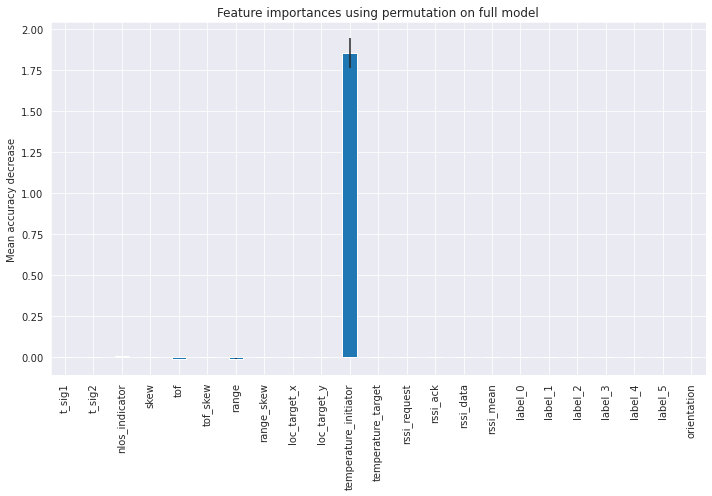

In [151]:
result = permutation_importance(reg, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=list(X_train.columns))

fig, ax = plt.subplots(figsize=(10, 7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()